CRIM - уровень преступности на душу населения в разбивке по городам

ZN - доля жилой земли, зонированной для участков площадью более 25 000 кв.футов.

INDUS - доля акров, не связанных с розничной торговлей, в каждом городе.

CHAS - Фиктивная переменная реки Чарльз (1, если тракт граничит с рекой; 0 в противном случае)

NOX - концентрация оксидов азота (частей на 10 миллионов)

RM - среднее количество комнат в жилом помещении

AGE - доля занимаемых владельцами квартир, построенных до 1940 года

DIS - Взвешенные расстояния до пяти бостонских центров занятости

RAD - индекс доступности к радиальным магистралям

TAX - полная стоимость недвижимости - ставка налога на 10 000 долларов США

PTRATIO - Соотношение учащихся и учителей в разбивке по городам

B - 1000(Bk - 0,63)^2, где Bk - доля чернокожих в разбивке по городам

LSTAT - более низкий статус населения в %

MEDV - Средняя стоимость домов, занимаемых владельцами, в 1000 долларах США

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # предупреждений по distplot много выводит

%matplotlib inline

In [2]:
# выполним некоторые настройки для корректной визуализации
sns.set(
    font_scale=2,
    style='whitegrid',
    rc={'figure.figsize': (30, 20)}
)

In [3]:
# загрузим данные
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

In [4]:
# добавим названия столбцов и преобразуем в датафрейм
df = pd.DataFrame(data)
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.shape # проверим корректность полученного датсета (число строк и столбцов)

(506, 14)

In [5]:
# посмотрим на типы данных (все числовые) и наличие пропусков (их нет)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
# взглянем на основные описательные статистики
descr = df.describe()
descr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# тут интересны перцентили по ZN и CHAS
# CHAS - по сути логическая переменная, показывает ограничивает тракт реку (1), или нет (0)
# учитывая крайне сильный разброс между максимальным и минимальным значением, а также нулевые перцентили с 25 по 75 - в основном неограничивает
# можно прикинуть сумму по столбцу, чтобы понять, что только в 35 случаях из 500 ограничение имеет место быть
df.CHAS.sum()

35.0

In [ ]:
# касательно ZN (доля жилых земель, зонированных для участков площадью более 25 000 кв. футов.)
# это тоже категориальная переменная (по сути проценты)
# 25 000 кв. футов - это довольно серьезная площадь, вполне логично, что у нас какая-то доля таких земель только с 75-го перцентиля начинает выпадать

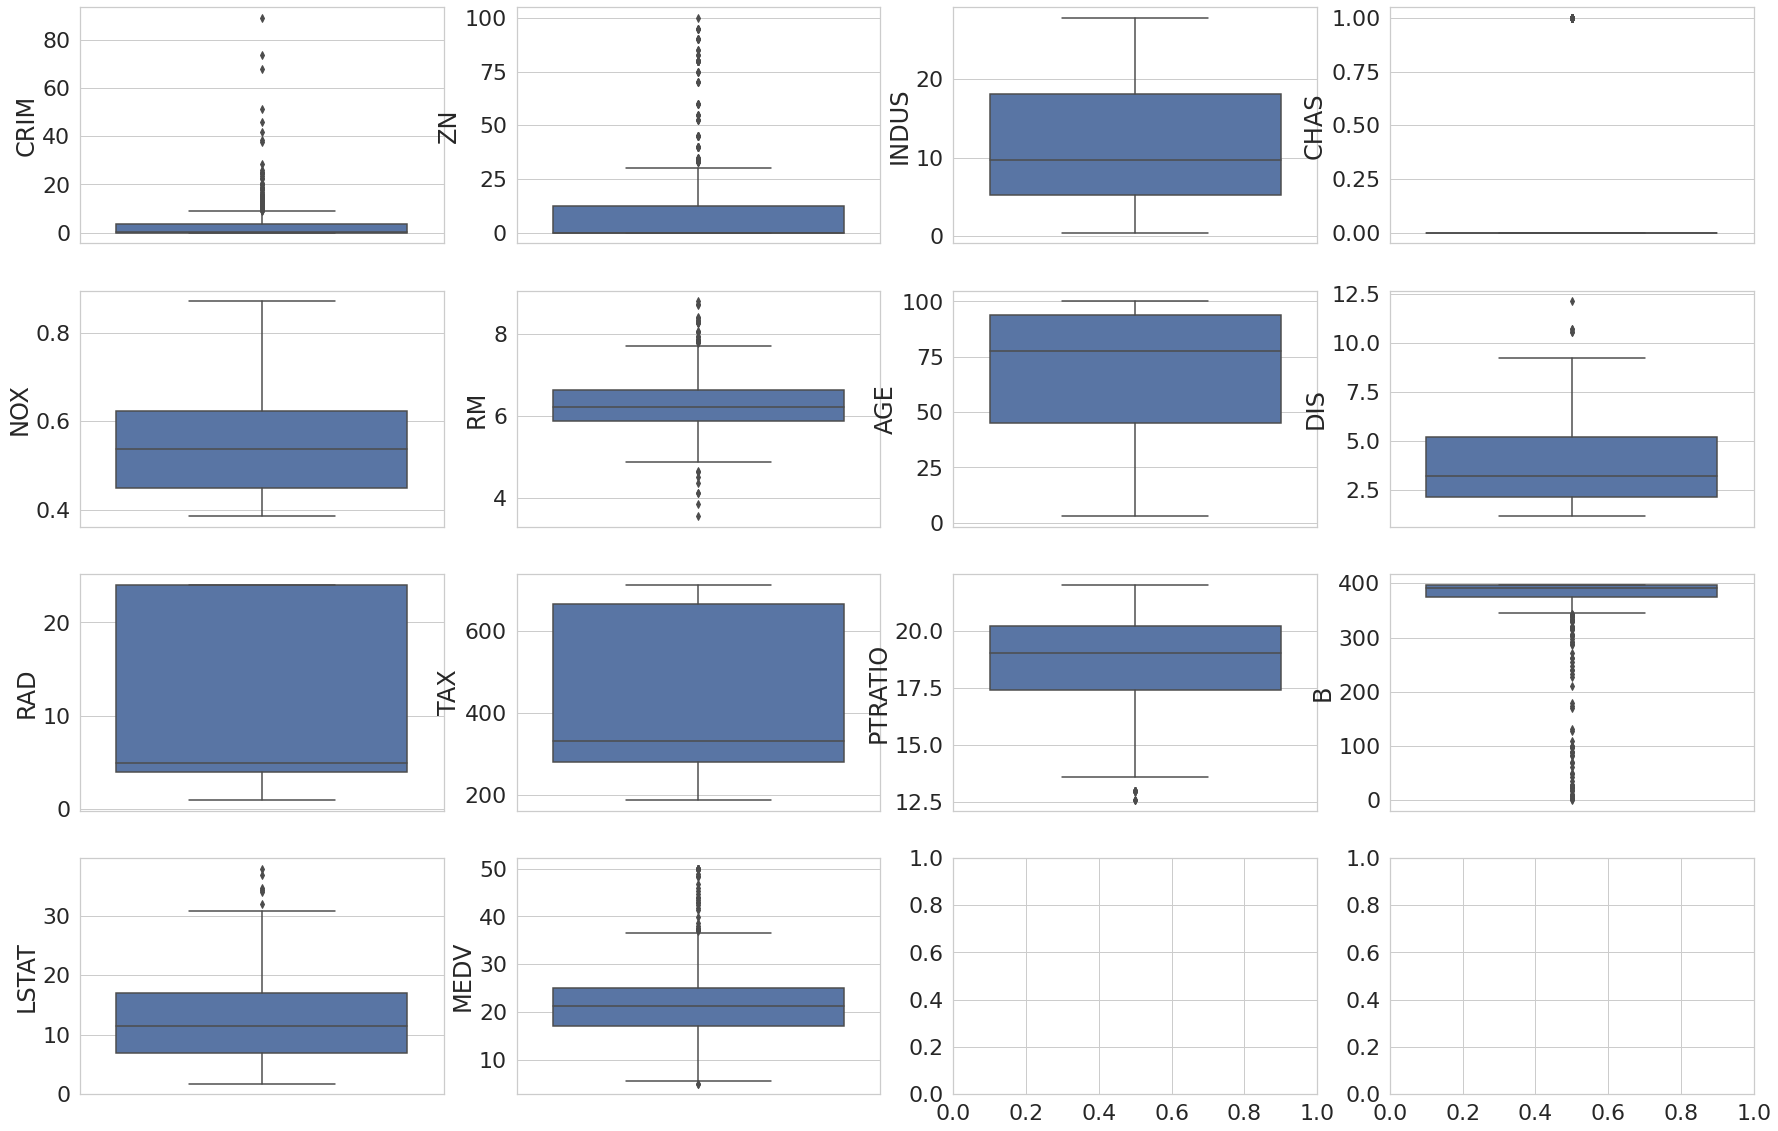

In [8]:
# учитывая все вышеперечисленное и сильных наличие сильных различий среднего с минимальным, или максимальным значениями по ряду переменных
# мы можем предположить наличие выбросов
# например - в переменных CRIM, ZN, CHAS, DIS, B
# построим boxplot для всех факторов
fig, axes = plt.subplots(ncols=4, nrows=4)
for i, j in zip(df.columns, range(14)):
  sns.boxplot(y=df[f'{i}'], ax=axes.flatten()[j])

В целом, как и предполагали - есть переменные с ярковыраженными выбросами, только изначально предполагаемый список стал еще больше (CRIM, ZN, CHAS, RM, DIS, PTRATIO, B, LSTAT, MEDV)
Стоит посмотреть на гистограммы распределений

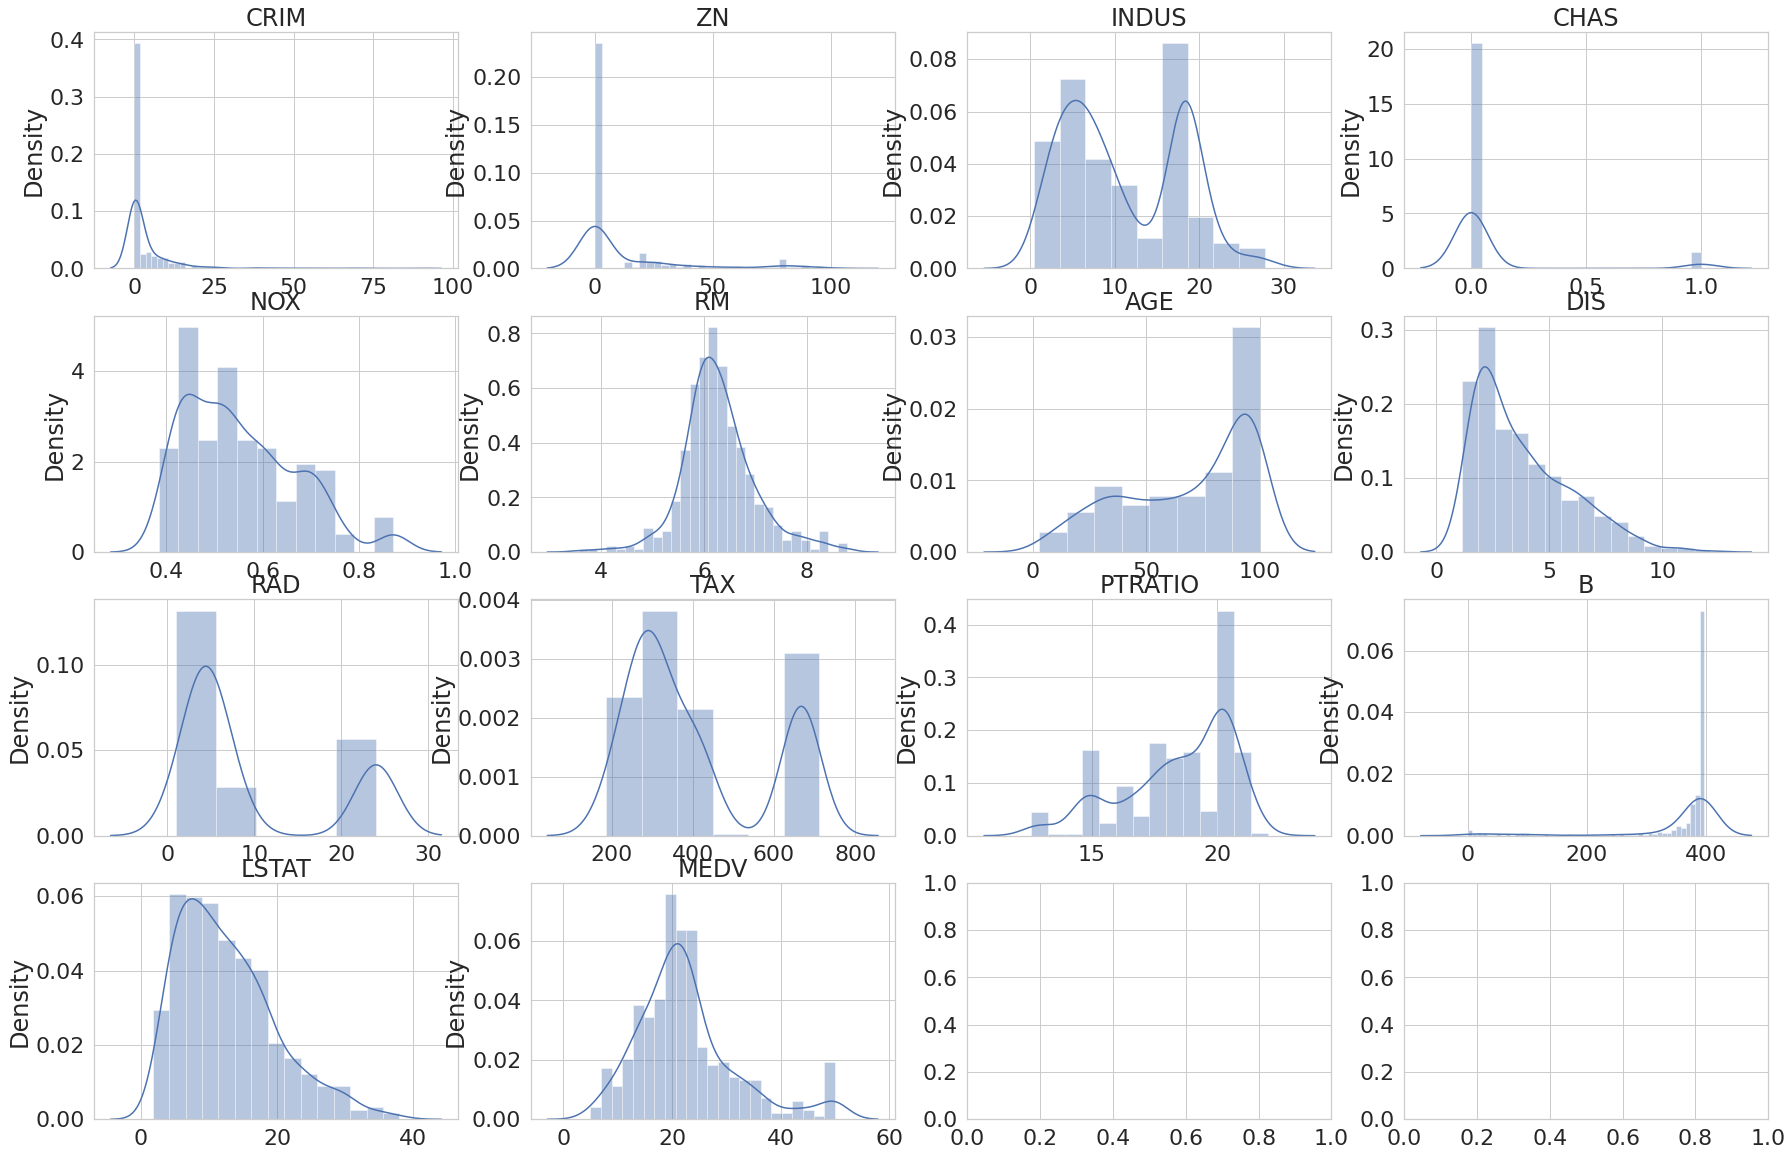

In [9]:
fig, axes = plt.subplots(ncols=4, nrows=4)
for i, j in zip(df.columns, range(14)):
  g = sns.distplot(x=df[f'{i}'], ax=axes.flatten()[j])
  g.set(title=f'{i}')

В общем-то, большей частью распределение данных далеко от нормального. Можно еще оценить линейность и монотонность взаимосвязи, но и так очевидно, что нам необходимо применять корреляцию Спирмена

(хотя я посмотрел на каггле - люди все как один делают через Пирсона и, хотя значения коэффициентов получаются немного другими, визуально тепловая карта почти идентично выглядит)

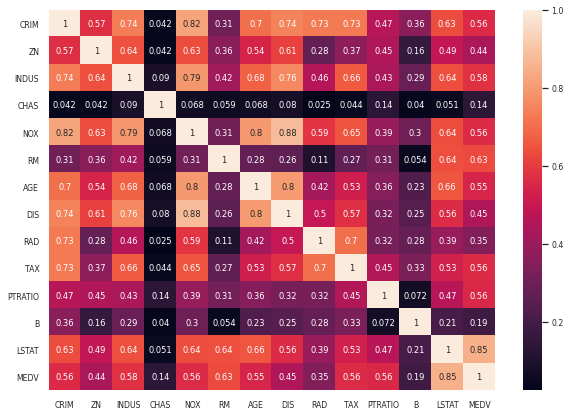

In [10]:
# поменял размеры
sns.set(
    font_scale=0.7,
    style='whitegrid',
    rc={'figure.figsize': (10, 7)}
)
# возьмем по модулю, т.к. знак нам непринципиален (обратная, или прямая взаимосвязь - по сути без разницы)
# но отрицательные значения портят восприятие тепловой карты
ax = sns.heatmap(df.corr(method="spearman").abs(), annot=True)

Интересный момент. Не сразу понял причин сильной взаимосвязи концентрации оксидов азота с такими переменными, как DIS, INDUS, AGE, CRIM. Но чуть подумав, оксиды азота - это по сути выхлопные газы, или выбросы в атмосферу промышленных предприятий. Т.е. по сути - чем выше значение этой переменной, тем ближе мы находимся к какому-то промышленному центру.

Далее я просто отбрасывал по 1-й сильнокоррелирующей переменной (corr => 0.8) и перестраивал матрицу корреляций до того момента, пока не останутся только факторы без сильной корреляции.

Еще я заранее решил предположить, что данные мы отбираем для прогнозирования MEDV, поэтому решил оставить переменную LSTAT - т.к. она сильно коррелирует именно с MEDV (причем как по хитмапу, так и по логике) и ни с чем другим кроме него.

In [11]:
# для этого написал функцию, чтобы по одной отбрасывать сильнокоррелирующие переменные
# threshold - верхняя граница допустимого коэффициента корреляции
# проверяем наличие по столбцу значений > 0.8 (1 - это главная диагональ, по хитмапу кроме нее единиц нигде нет)
def correlation(dat, threshold):
    corr_table = dat.corr(method="spearman").abs() # получаем матрицу корреляций
    for cor in corr_table: # перебираем столбцы
      if cor not in ['LSTAT', 'MEDV'] and corr_table[cor].apply(lambda i: i >= threshold and i != 1).any():
        return cor

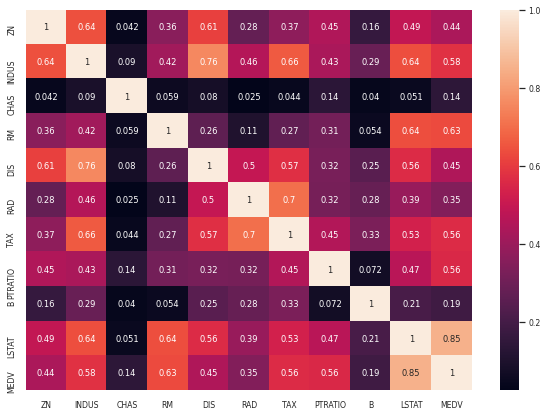

In [12]:
# взял threshold = 0.8 (прочитал в какой-то методичке, что именно выше такого уровня переменные считаются сильнокоррелирующими)

df_1 = df # перезаписал, чтобы исходный датафрейм не поломать (мало ли)

# запускаем цикл отброса переменных
while len(df_1.columns):
  del_col = correlation(df_1, 0.8) # получаем сильнокоррелирующую переменную
  if del_col:
    df_1 = df_1.drop(columns=f'{del_col}') # удаляем ее
  else:
    break # если такой переменной нет - выходим из цикла

# визуализируем новую тепловую карту
sns.set(
    font_scale=0.7,
    style='whitegrid',
    rc={'figure.figsize': (10, 7)}
)

ax = sns.heatmap(df_1.corr(method="spearman").abs(),  annot=True)

Стало получше - теперь тут нет таких ярковыраженных корреляций, однако, все-таки нам врядли нужны переменные, с корреляцией => 0.7, т.к. ее можно считать достаточно значимой. Перезапустим наш цикл с threshold = 0.7

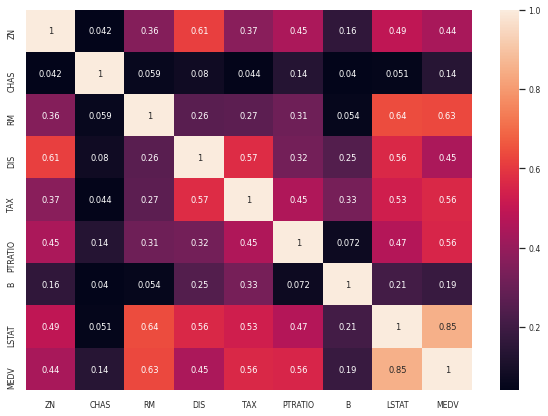

In [13]:
while len(df_1.columns):
  del_col = correlation(df_1, 0.7) # единственное изменение предыдущего шага
  if del_col:
    df_1 = df_1.drop(columns=f'{del_col}')
  else:
    break

sns.set(
    font_scale=0.7,
    style='whitegrid',
    rc={'figure.figsize': (10, 7)}
)

ax = sns.heatmap(df_1.corr(method="spearman").abs(),  annot=True)

Ну вот, теперь вполне себе неплохо. Далее определим предсказываемую переменную (судя по описанию переменных тут это явно MEDV - Средняя стоимость домов, занимаемых владельцами, в 1000 долларах США) и построим графики зависимостей.
Выведем также линию регрессии на графике

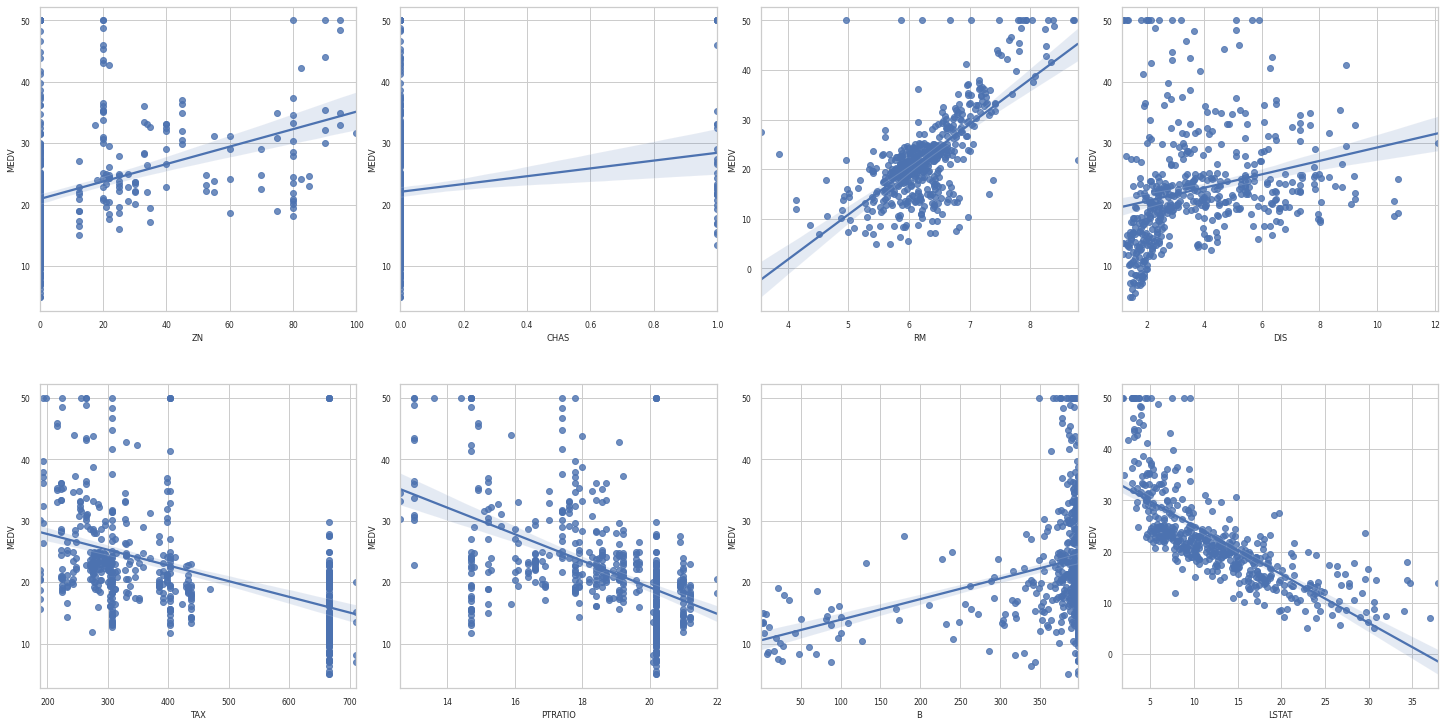

In [14]:
column_sels = df_1.loc[:, df_1.columns != 'MEDV'].columns # отбираем все столбцы, кроме MEDV

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10)) # зададим размеры

axs = axs.flatten()

for i, k in enumerate(column_sels):
    sns.regplot(y=df_1['MEDV'], x=df_1[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Собственно, черный столбец (переменная CHAS) на предыдущем этапе (с низкой корреляцией) оставил специально - хотел показать на графике. В целом тут все закономерно - по сути булевая переменная (значения 0, или 1) корреляция с MEDV почти отсутствует (0.14), так это выглядит на этом графике. Ее тоже можно убрать из модели.

Таким образом, в модели остается 6 предикторов (ZN, RM, DIS, TAX, PTRATIO, B, LSTAT) и 1 таргет (MEDV).

Сформируем итоговый датафрейм

In [15]:
df_result = df_1.loc[:, df_1.columns != 'CHAS']
df_result.head()

,ZN,RM,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,18.0,6.575,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.0,6.421,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.0,7.185,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.0,6.998,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.0,7.147,6.0622,222.0,18.7,396.90,5.33,36.2
